##                            EXPLORATORY DATA ANALYSIS ON HABERMAN DATASET 

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

There are 4 features of this dataset, namely: 
    
    1. Age of the patient
    2. Year of Operation
    3. Number of Axillary Lymph Nodes
    4. Patient Survived Status

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore") 

In [3]:
#Loading haberman dataset into pandas dataframe
df = pd.read_csv("haberman (1).csv")

#Number of Data-points and Features
print(df.shape)

#Renaming the column name
df.rename(index=str, columns={"status": "Patient_Survived_Status"}, inplace=True) 
print(df.columns)

#Mapping String values to Integer
z = {1:'Yes', 2:'No'}
df.Patient_Survived_Status = df.Patient_Survived_Status.map(z)
df.head(5)

FileNotFoundError: File b'haberman (1).csv' does not exist

#### Changing column values:  https://stackoverflow.com/questions/40901770/is-there-a-simple-way-to-change-a-column-of-yes-no-to-1-0-in-a-pandas-dataframe

In [7]:
df.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


52
Yes    225
No      81
Name: Patient_Survived_Status, dtype: int64
73.52941176470588


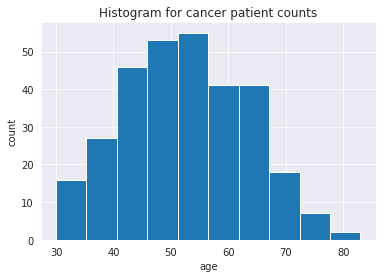

In [38]:
count = df['age'].value_counts()

#to find out the key value corresponding to the count
print(df['age'].value_counts().idxmax())   

print(df['Patient_Survived_Status'].value_counts())

plt.hist(df.age)
plt.title("Histogram for cancer patient counts")
plt.xlabel("age")
plt.ylabel("count")
print(225/306*100)

### Observations: 

1. Maximum number of cancer patients were of age 52.

2. 225 patients survived(73.53%) and 81 patients died(26.47%).

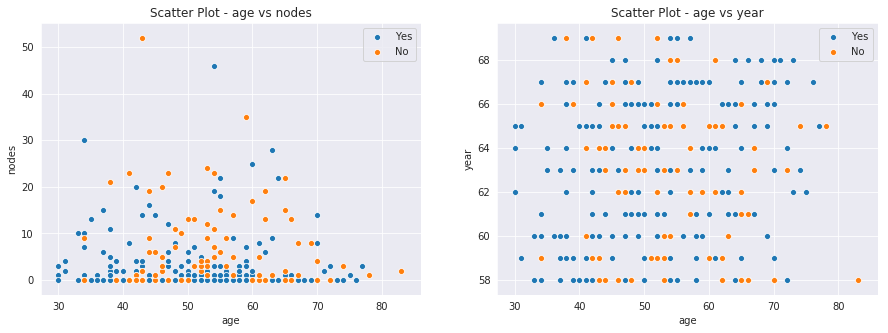

In [34]:
# 2D Scatter-Plot

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
g = sns.FacetGrid(df,  hue='Patient_Survived_Status')
g.map(sns.scatterplot, 'age', 'nodes', ax = ax1)
ax1.set_title("Scatter Plot - age vs nodes")
ax1.legend()
g.map(sns.scatterplot, 'age', 'year', ax = ax2)
ax2.set_title("Scatter Plot - age vs year")
ax2.legend()
plt.close()

### Observations: 

1. From plot_1, we could see mostly the nodes were scattered around (0-10). Chances of survival are higher if aged less than 40.

2. From plot_2, although much cannot be deduced, but we can say most of the patients who died over the period of years were aged (40-70)

#### fig, ax subplots: https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python

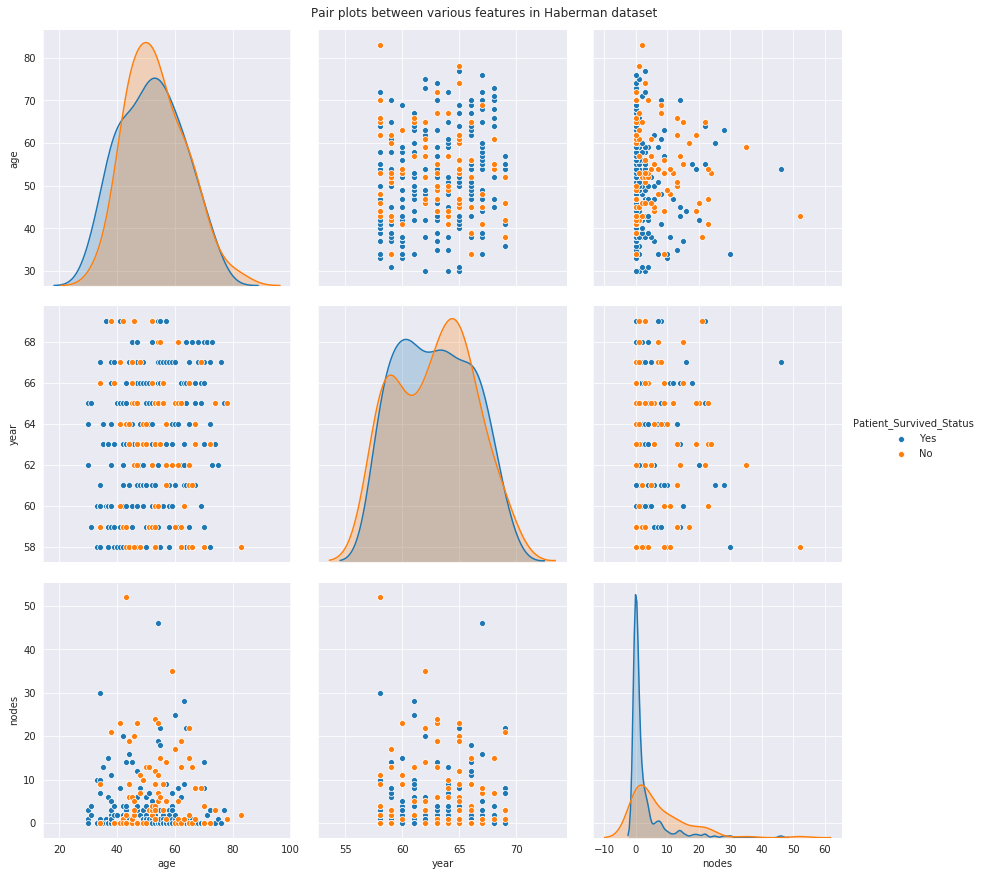

In [48]:
# Multivariate Analysis: Pair-Plots

sns.set_style("darkgrid");
sns.pairplot(df, hue="Patient_Survived_Status", height=4);
plt.suptitle("Pair plots between various features in Haberman dataset", y=1.01)
plt.show()

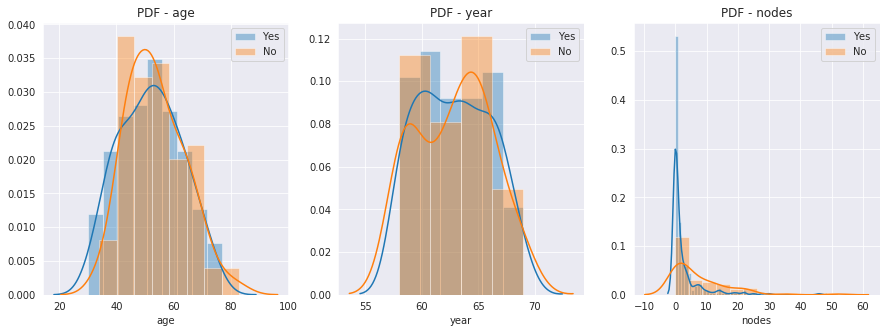

In [39]:
#Probability-Density-Functions(PDF)

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
g = sns.FacetGrid(df, hue='Patient_Survived_Status')
g.map(sns.distplot, 'age', ax = ax1)
ax1.set_title("PDF - age")
ax1.legend()
g.map(sns.distplot, 'year', ax = ax2)
ax2.set_title("PDF - year")
ax2.legend()
g.map(sns.distplot, 'nodes', ax = ax3)
ax3.set_title("PDF - nodes")
ax3.legend()
plt.tight_layout()
plt.close()

### Observations:

1. From the first 2 plots, we cannot conclude anything as most of the points are having similar density.

2. From the 3rd plot, we can say that the chances of survival if nodes are:
        1. Very high if equal to 0.
        2. High if greater than 0 and less than 3.5(approx.).
        3. Chances of death are higher if nodes are greater than 3.5(approx.).
        
3. Nodes seems to be an important feature in this dataset.

In [1]:
#Plotting Cumulative Distribution Function(CDF)

df_alive = df.loc[df["Patient_Survived_Status"] == "Yes"]
df_dead = df.loc[df["Patient_Survived_Status"] == "No"]
#print(df_alive)


counts, bin_edges = np.histogram(df_alive['nodes'], bins=10, density = True)

pdf = counts/(sum(counts))
print(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="alive_nodes");
plt.plot(bin_edges[1:], cdf, label="alive_cdf")

counts, bin_edges = np.histogram(df_dead['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="dead_nodes");
plt.plot(bin_edges[1:], cdf, label="dead_cdf")
plt.title("CDF for Patients who survived/died based on nodes")
plt.xlabel("nodes")
plt.ylabel("Percentage * 100")
plt.legend()
plt.show()


NameError: name 'df' is not defined

### Observations:

1. From plot 1, 80% of the patients who survived were aged 63 and less.

2. From plot 2, we can say that chances of survival is 83.55% if number of nodes are < 4. Around 90% of people who survived had less than 10 nodes.

3. Around 65% of the patients who didn't survive had less than 10 nodes.

4. As the number of nodes increases, the chances of survival decreases. More than 90% of patients have less chances of survival if number of nodes are more than 20. For nodes 30 and above, almost 100% of the patients have less chances of survival.

5. Patients having nodes greater than 45 have hardly any chance of survival.

In [51]:
#Mean and std. deviation

print("Means:")
print(np.mean(df_alive["nodes"]))
print(np.mean(df_dead["nodes"]))

print("\nStd. Deviation:")
print(np.std(df_alive["nodes"]))
print(np.std(df_dead["nodes"]))

Means:
2.7911111111111113
7.45679012345679

Std. Deviation
5.857258449412131
9.128776076761632


In [69]:
#Median, Quantiles, Percentiles, MAD

print("\nMedians:")
print("Median for nodes:", np.median(df["nodes"]))
print("Median for alive nodes:", np.median(df_alive["nodes"]))
print("Median for dead nodes:", np.median(df_dead["nodes"]))

print("\nQuantiles:")
print(np.percentile(df_alive["nodes"],np.arange(0, 100, 25)))
print(np.percentile(df_dead["nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(df_alive["nodes"],90))
print(np.percentile(df_dead["nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(df_alive["nodes"]))
print(robust.mad(df_dead["nodes"]))


Medians:
Median for nodes: 1.0
Median for alive nodes: 0.0
Median for dead nodes: 4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


### Observations:

1. Around 50% of the total patients had 1 node.

2. 50% of the patients who survived had 0 nodes.

3. 50% of the patients who died had 4 or mode nodes.

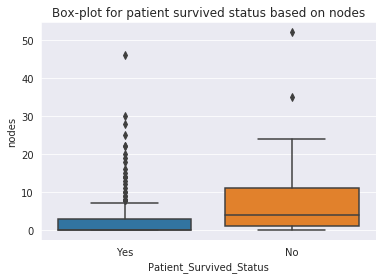

In [71]:
#Box plots

sns.boxplot(x='Patient_Survived_Status', y='nodes', data=df)
plt.title("Box-plot for patient survived status based on nodes")
plt.show()

Observations:

1. From the first box plot, we can say 75% of the patients who survived had around less than 4 nodes and 50% of the patients who survived had 0 nodes.

2. From the 2nd box plot, we can say 50% of the patients who didn't survive had 5 or more nodes.

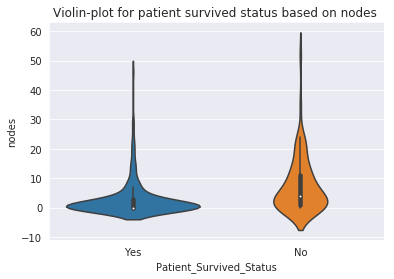

In [73]:
#Violin-plots

sns.violinplot(x='Patient_Survived_Status', y='nodes', data=df)
plt.title("Violin-plot for patient survived status based on nodes ")
plt.show()
plt.close()

### Observations:
    
1. 50% of the patients who survived had 0 nodes, the threshold of survival being in range 0-5.

2. From the 2nd violin plot, we can see the threshold of patients being dead is the nodes being in the range 0-12 .

3. Comparing both the violin plots, the more the number of nodes, the chances of survival gets less.

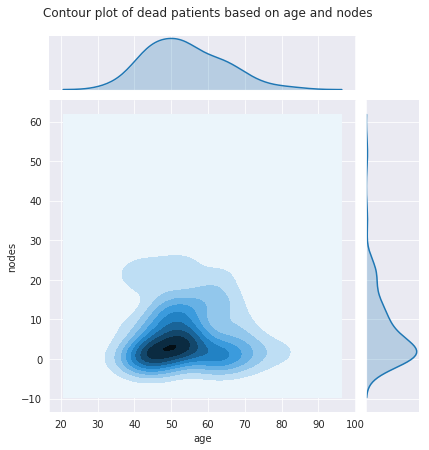

In [84]:
sns.jointplot(x="age", y="nodes", data=df_dead, kind="kde")
plt.title("Contour plot of dead patients based on age and nodes", x=-3, y=1.25)
plt.show()

### Observations:

1. Most of the patients who died had nodes greater than 4(approx.).

2. The age of the patients who died were mostly in the range 45-60.

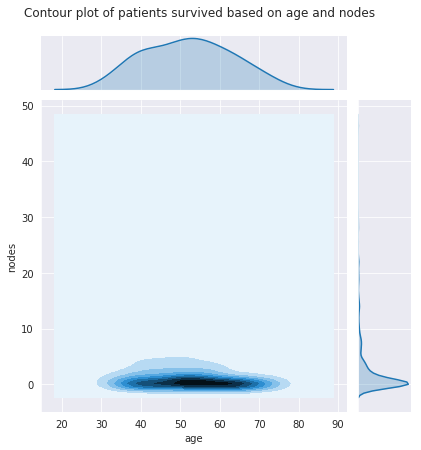

In [85]:
sns.jointplot(x="age", y="nodes", data=df_alive, kind="kde")
plt.title("Contour plot of patients survived based on age and nodes", x=-3, y=1.25)
plt.show()

### Observations:

1. A large portion of patients who survived were in the age range 49-62 and had 0-3 nodes(approx).

## Conclusion:

1. Nodes is a relatively important feature in the dataset compared to the rest of features.

2. Younger patients have higher chances of survival.

3. As the number of nodes increases, chances of survival decreases. Patients having nodes less than 3 have higher chances of survival than those having more than 3 nodes.

4. Patients having nodes greater than 45 have hardly any chance of survival.